In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import fastf1 as f1
from ing_theme_matplotlib import mpl_style
import mplcyberpunk
from fastf1 import plotting

In [2]:
f1.Cache.enable_cache("../cache")

*Qualifying*


In [3]:
quali = f1.get_session(2024, "Azerbaijan", "Qualifying")
quali.load()

core           INFO 	Loading data for Azerbaijan Grand Prix - Qualifying [v3.3.9]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            IN

In [4]:
quali.session_info

{'Meeting': {'Key': 1245,
  'Name': 'Azerbaijan Grand Prix',
  'OfficialName': 'FORMULA 1 QATAR AIRWAYS AZERBAIJAN GRAND PRIX 2024',
  'Location': 'Baku',
  'Country': {'Key': 30, 'Code': 'AZE', 'Name': 'Azerbaijan'},
  'Circuit': {'Key': 144, 'ShortName': 'Baku'}},
 'ArchiveStatus': {'Status': 'Generating'},
 'Key': 9594,
 'Type': 'Qualifying',
 'Name': 'Qualifying',
 'StartDate': datetime.datetime(2024, 9, 14, 16, 0),
 'EndDate': datetime.datetime(2024, 9, 14, 17, 0),
 'GmtOffset': datetime.timedelta(seconds=14400),
 'Path': '2024/2024-09-15_Azerbaijan_Grand_Prix/2024-09-14_Qualifying/'}

In [5]:
quali.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
16,LEC,Ferrari,NaN,1.0,NaT,
81,PIA,McLaren,NaN,2.0,NaT,
55,SAI,Ferrari,NaN,3.0,NaT,
11,PER,Red Bull Racing,NaN,4.0,NaT,
63,RUS,Mercedes,NaN,5.0,NaT,
1,VER,Red Bull Racing,NaN,6.0,NaT,
44,HAM,Mercedes,NaN,7.0,NaT,
14,ALO,Aston Martin,NaN,8.0,NaT,
43,COL,Williams,NaN,9.0,NaT,
23,ALB,Williams,NaN,10.0,NaT,


In [6]:
quali.laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:17:01.731000,LEC,16,NaT,1.0,1.0,0 days 00:14:48.249000,NaT,NaT,0 days 00:00:53.737000,...,True,Ferrari,0 days 00:14:48.249000,2024-09-14 12:01:53.799,1,NaN,False,,False,False
1,0 days 00:18:45.326000,LEC,16,0 days 00:01:43.595000,2.0,1.0,NaT,NaT,0 days 00:00:36.853000,0 days 00:00:41.715000,...,True,Ferrari,0 days 00:17:01.731000,2024-09-14 12:04:07.281,1,NaN,False,,False,True
2,0 days 00:20:59.893000,LEC,16,0 days 00:02:14.567000,3.0,1.0,NaT,NaT,0 days 00:00:51.584000,0 days 00:00:56.573000,...,True,Ferrari,0 days 00:18:45.326000,2024-09-14 12:05:50.876,1,NaN,False,,False,True
3,0 days 00:23:09.315000,LEC,16,0 days 00:02:09.422000,4.0,1.0,NaT,NaT,0 days 00:00:46.328000,0 days 00:00:56.321000,...,True,Ferrari,0 days 00:20:59.893000,2024-09-14 12:08:05.443,12,NaN,True,DOUBLE YELLOW AT TURN 1,False,True
4,0 days 00:24:52.090000,LEC,16,0 days 00:01:42.775000,5.0,1.0,NaT,NaT,0 days 00:00:36.162000,0 days 00:00:41.601000,...,True,Ferrari,0 days 00:23:09.315000,2024-09-14 12:10:14.865,12,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0 days 00:44:10.899000,GAS,10,0 days 00:01:43.640000,11.0,4.0,NaT,NaT,0 days 00:00:36.770000,0 days 00:00:41.863000,...,False,Alpine,0 days 00:42:27.259000,2024-09-14 12:29:32.809,1,NaN,False,,False,True
307,0 days 00:46:12.986000,GAS,10,0 days 00:02:02.087000,12.0,4.0,NaT,0 days 00:46:11.671000,0 days 00:00:41.810000,0 days 00:00:47.376000,...,False,Alpine,0 days 00:44:10.899000,2024-09-14 12:31:16.449,1,NaN,False,,False,False
308,0 days 00:50:23.605000,GAS,10,NaT,13.0,5.0,0 days 00:48:33.142000,NaT,NaT,0 days 00:00:45.758000,...,True,Alpine,0 days 00:46:12.986000,2024-09-14 12:33:18.536,1,NaN,False,,False,False
309,0 days 00:52:06.784000,GAS,10,0 days 00:01:43.179000,14.0,5.0,NaT,NaT,0 days 00:00:36.266000,0 days 00:00:41.849000,...,True,Alpine,0 days 00:50:23.605000,2024-09-14 12:37:29.155,1,NaN,False,,False,True


In [10]:
lec = quali.get_driver("LEC")
lec

DriverNumber                                                         16
BroadcastName                                                 C LECLERC
Abbreviation                                                        LEC
DriverId                                                        leclerc
TeamName                                                        Ferrari
TeamColor                                                        E80020
TeamId                                                          ferrari
FirstName                                                       Charles
LastName                                                        Leclerc
FullName                                                Charles Leclerc
HeadshotUrl           https://media.formula1.com/d_driver_fallback_i...
CountryCode                                                         MON
Position                                                            1.0
ClassifiedPosition                                              

In [11]:
lec_laps = quali.laps.pick_driver("LEC")
lec_lap_time = lec_laps["LapTime"]
lec_sec1 = lec_laps["Sector1Time"]
lec_sec2 = lec_laps["Sector2Time"]
lec_sec3 = lec_laps["Sector3Time"]
lec_laps.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
]

,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
0,NaT,NaT,0 days 00:00:53.737000,0 days 00:00:26.509000,168.0,188.0,340.0,302.0
1,0 days 00:01:43.595000,0 days 00:00:36.853000,0 days 00:00:41.715000,0 days 00:00:25.027000,214.0,233.0,335.0,315.0
2,0 days 00:02:14.567000,0 days 00:00:51.584000,0 days 00:00:56.573000,0 days 00:00:26.410000,154.0,159.0,342.0,303.0
3,0 days 00:02:09.422000,0 days 00:00:46.328000,0 days 00:00:56.321000,0 days 00:00:26.773000,146.0,168.0,338.0,302.0
4,0 days 00:01:42.775000,0 days 00:00:36.162000,0 days 00:00:41.601000,0 days 00:00:25.012000,221.0,233.0,337.0,317.0
5,0 days 00:02:20.352000,0 days 00:00:50.579000,0 days 00:00:54.448000,0 days 00:00:35.325000,137.0,178.0,NaN,284.0
6,NaT,NaT,0 days 00:00:46.343000,0 days 00:00:26.513000,193.0,203.0,331.0,296.0
7,0 days 00:01:43.422000,0 days 00:00:36.513000,0 days 00:00:41.906000,0 days 00:00:25.003000,218.0,227.0,336.0,317.0
8,0 days 00:02:02.980000,0 days 00:00:41.970000,0 days 00:00:46.601000,0 days 00:00:34.409000,181.0,206.0,NaN,290.0
9,NaT,0 days 00:01:36.422000,0 days 00:00:48.732000,0 days 00:00:26.401000,188.0,206.0,333.0,298.0


In [14]:
fastest_lec = lec_laps.pick_fastest()
tele_lec = fastest_lec.get_telemetry().add_distance()
tele_lec.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,336,8,11931
3,337,8,11935
4,337,8,11966
5,337,8,11958
6,338,8,11951
...,...,...,...
792,337,8,12009
793,338,8,11979
794,339,8,11949
795,338,8,11948


In [13]:
pia = quali.get_driver("PIA")
pia

DriverNumber                                                         81
BroadcastName                                                 O PIASTRI
Abbreviation                                                        PIA
DriverId                                                        piastri
TeamName                                                        McLaren
TeamColor                                                        FF8000
TeamId                                                          mclaren
FirstName                                                         Oscar
LastName                                                        Piastri
FullName                                                  Oscar Piastri
HeadshotUrl           https://media.formula1.com/d_driver_fallback_i...
CountryCode                                                         AUS
Position                                                            2.0
ClassifiedPosition                                              

In [8]:
pia_laps = quali.laps.pick_driver("PIA")
pia_lap_time = pia_laps["LapTime"]
pia_sec1 = pia_laps["Sector1Time"]
pia_sec2 = pia_laps["Sector2Time"]
pia_sec3 = pia_laps["Sector3Time"]
pia_laps.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
]

,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
20,NaT,NaT,0 days 00:00:52.712000,0 days 00:00:26.122000,154.0,200.0,334.0,304.0
21,0 days 00:01:43.845000,0 days 00:00:37.189000,0 days 00:00:41.831000,0 days 00:00:24.825000,211.0,227.0,342.0,319.0
22,0 days 00:02:20.534000,0 days 00:00:56.489000,0 days 00:00:57.901000,0 days 00:00:26.144000,154.0,167.0,336.0,307.0
23,0 days 00:01:43.623000,0 days 00:00:36.596000,0 days 00:00:41.979000,0 days 00:00:25.048000,213.0,230.0,336.0,319.0
24,0 days 00:02:20.488000,0 days 00:00:49.167000,0 days 00:00:53.247000,0 days 00:00:38.074000,160.0,169.0,NaN,242.0
25,NaT,NaT,0 days 00:00:54.358000,0 days 00:00:26.133000,179.0,195.0,335.0,305.0
26,0 days 00:01:43.033000,0 days 00:00:36.483000,0 days 00:00:41.591000,0 days 00:00:24.959000,209.0,233.0,336.0,318.0
27,0 days 00:02:13.727000,0 days 00:00:45.350000,0 days 00:00:51.482000,0 days 00:00:36.895000,153.0,185.0,NaN,253.0
28,NaT,NaT,0 days 00:00:52.497000,0 days 00:00:26.047000,181.0,199.0,333.0,305.0
29,0 days 00:01:42.598000,0 days 00:00:36.232000,0 days 00:00:41.563000,0 days 00:00:24.803000,211.0,228.0,336.0,319.0


In [9]:
fastest_pia = pia_laps.pick_fastest()
tele_pia = fastest_pia.get_telemetry().add_distance()
tele_pia.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,334,8,11737
3,334,8,11750
4,334,8,11776
5,334,8,11773
6,334,8,11770
...,...,...,...
798,335,8,11802
799,335,8,11811
800,336,8,11821
801,336,8,11833


In [15]:
sai = quali.get_driver("SAI")
sai

DriverNumber                                                         55
BroadcastName                                                   C SAINZ
Abbreviation                                                        SAI
DriverId                                                          sainz
TeamName                                                        Ferrari
TeamColor                                                        E80020
TeamId                                                          ferrari
FirstName                                                        Carlos
LastName                                                          Sainz
FullName                                                   Carlos Sainz
HeadshotUrl           https://media.formula1.com/d_driver_fallback_i...
CountryCode                                                         ESP
Position                                                            3.0
ClassifiedPosition                                              

In [16]:
sai_laps = quali.laps.pick_driver("SAI")
sai_lap_time = sai_laps["LapTime"]
sai_sec1 = sai_laps["Sector1Time"]
sai_sec2 = sai_laps["Sector2Time"]
sai_sec3 = sai_laps["Sector3Time"]
sai_laps.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
]

,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
39,NaT,NaT,0 days 00:00:54.192000,0 days 00:00:26.552000,182.0,188.0,338.0,299.0
40,0 days 00:02:06.108000,0 days 00:00:47.215000,0 days 00:00:52.351000,0 days 00:00:26.542000,168.0,192.0,341.0,301.0
41,0 days 00:01:43.517000,0 days 00:00:36.427000,0 days 00:00:42.048000,0 days 00:00:25.042000,220.0,226.0,339.0,316.0
42,NaT,0 days 00:00:55.497000,0 days 00:01:07.478000,0 days 00:00:34.531000,153.0,173.0,334.0,297.0
43,NaT,0 days 00:01:05.030000,0 days 00:00:58.030000,0 days 00:00:27.462000,168.0,148.0,336.0,299.0
44,0 days 00:02:23.818000,0 days 00:00:42.528000,0 days 00:01:11.878000,0 days 00:00:29.412000,63.0,26.0,336.0,298.0
45,0 days 00:02:12.752000,0 days 00:00:43.205000,0 days 00:00:59.682000,0 days 00:00:29.865000,153.0,121.0,342.0,304.0
46,0 days 00:01:43.357000,0 days 00:00:36.573000,0 days 00:00:41.782000,0 days 00:00:25.002000,218.0,228.0,338.0,318.0
47,0 days 00:02:25.699000,0 days 00:00:46.237000,0 days 00:00:57.776000,0 days 00:00:41.686000,163.0,157.0,NaN,225.0
48,NaT,NaT,0 days 00:00:47.553000,0 days 00:00:26.697000,187.0,207.0,331.0,296.0


In [17]:
fastest_sai = sai_laps.pick_fastest()
tele_sai = fastest_sai.get_telemetry().add_distance()
tele_sai.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,335,8,11911
3,335,8,11912
4,336,8,11915
5,336,8,11931
6,337,8,11948
...,...,...,...
798,336,8,11967
799,336,8,11970
800,336,8,11973
801,336,8,11973


In [18]:
per = quali.get_driver("PER")
per

DriverNumber                                                         11
BroadcastName                                                   S PEREZ
Abbreviation                                                        PER
DriverId                                                          perez
TeamName                                                Red Bull Racing
TeamColor                                                        3671C6
TeamId                                                         red_bull
FirstName                                                        Sergio
LastName                                                          Perez
FullName                                                   Sergio Perez
HeadshotUrl           https://media.formula1.com/d_driver_fallback_i...
CountryCode                                                         MEX
Position                                                            4.0
ClassifiedPosition                                              

In [19]:
per_laps = quali.laps.pick_driver("PER")
per_lap_time = per_laps["LapTime"]
per_sec1 = per_laps["Sector1Time"]
per_sec2 = per_laps["Sector2Time"]
per_sec3 = per_laps["Sector3Time"]
per_laps.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
]

,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
62,NaT,NaT,0 days 00:00:46.599000,0 days 00:00:26.191000,168.0,195.0,340.0,304.0
63,0 days 00:01:43.436000,0 days 00:00:36.472000,0 days 00:00:41.769000,0 days 00:00:25.195000,221.0,235.0,339.0,315.0
64,0 days 00:02:22.951000,0 days 00:00:51.950000,0 days 00:00:59.696000,0 days 00:00:31.305000,148.0,114.0,293.0,253.0
65,0 days 00:02:02.289000,0 days 00:00:43.973000,0 days 00:00:52.179000,0 days 00:00:26.137000,169.0,204.0,338.0,303.0
66,0 days 00:01:43.213000,0 days 00:00:36.370000,0 days 00:00:41.596000,0 days 00:00:25.247000,217.0,234.0,339.0,316.0
67,0 days 00:02:08.321000,0 days 00:00:44.396000,0 days 00:00:47.466000,0 days 00:00:36.459000,181.0,210.0,NaN,284.0
68,NaT,NaT,0 days 00:00:46.276000,0 days 00:00:26.023000,190.0,196.0,339.0,303.0
69,0 days 00:01:42.263000,0 days 00:00:35.904000,0 days 00:00:41.332000,0 days 00:00:25.027000,231.0,232.0,340.0,317.0
70,0 days 00:02:16.809000,0 days 00:00:45.267000,0 days 00:00:50.341000,0 days 00:00:41.201000,174.0,156.0,NaN,242.0
71,NaT,NaT,0 days 00:00:49.239000,0 days 00:00:25.980000,190.0,205.0,338.0,304.0


In [20]:
fastest_per = per_laps.pick_fastest()
tele_per = fastest_per.get_telemetry().add_distance()
tele_per.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,341,8,11989
3,342,8,11992
4,342,8,12001
5,342,8,12011
6,342,8,12008
...,...,...,...
789,339,8,12001
790,339,8,12013
791,339,8,12026
792,339,8,12037


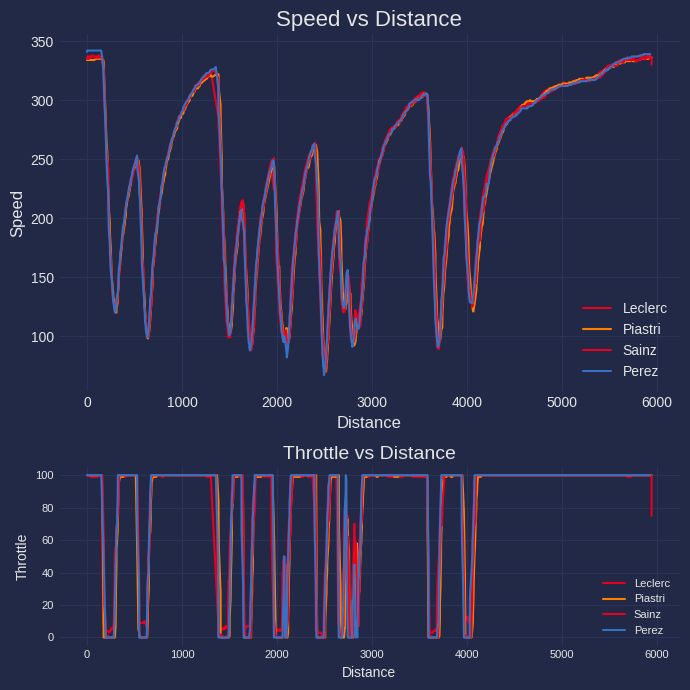

In [23]:
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip("#")
    r, g, b = [int(hex_color[i : i + 2], 16) for i in (0, 2, 4)]
    return (r / 255, g / 255, b / 255)


def get_driver_color(driver_abbreviation):
    driver = quali.get_driver(driver_abbreviation)
    team_color = driver.TeamColor
    return hex_to_rgb(team_color)


plt.style.use("cyberpunk")

fig, ax = plt.subplots(2, 1, figsize=(7, 7), height_ratios=[2, 1])

ax[0].plot(
    tele_lec.Distance, tele_lec.Speed, label="Leclerc", color=get_driver_color("LEC")
)
ax[0].plot(
    tele_pia.Distance, tele_pia.Speed, label="Piastri", color=get_driver_color("PIA")
)
ax[0].plot(
    tele_sai.Distance, tele_sai.Speed, label="Sainz", color=get_driver_color("SAI")
)
ax[0].plot(
    tele_per.Distance, tele_per.Speed, label="Perez", color=get_driver_color("PER")
)
ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)

ax[1].plot(
    tele_lec.Distance, tele_lec.Throttle, label="Leclerc", color=get_driver_color("LEC")
)
ax[1].plot(
    tele_pia.Distance, tele_pia.Throttle, label="Piastri", color=get_driver_color("PIA")
)
ax[1].plot(
    tele_sai.Distance, tele_sai.Throttle, label="Sainz", color=get_driver_color("SAI")
)
ax[1].plot(
    tele_per.Distance, tele_per.Throttle, label="Perez", color=get_driver_color("PER")
)
ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()

In [24]:
def convert_to_normal(time):
    if pd.isna(time):
        return time

    time_str = str(time)
    parts = time_str.split()

    days = int(parts[0])
    minutes, seconds_with_microseconds = parts[2].split(":")[1:]
    seconds, microseconds = seconds_with_microseconds.split(".")

    minutes = int(minutes)
    seconds = int(seconds)
    microseconds = int(microseconds)

    total_microseconds = (
        days * 86400000000 + minutes * 60000000 + seconds * 1000000 + microseconds
    )

    minutes, remaining_microseconds = divmod(total_microseconds, 60000000)
    seconds, microseconds = divmod(remaining_microseconds, 1000000)

    normal_time = f"{minutes:02d}:{seconds:02d}.{microseconds:06d}"
    return normal_time

In [29]:
driver1_sectors = pd.DataFrame(
    {
        "Driver": ["Leclerc"] * len(lec_sec1),
        "Sector1Time": lec_sec1,
        "Sector2Time": lec_sec2,
        "Sector3Time": lec_sec3,
        "Lap Time": lec_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
        "Driver": ["Piastri"] * len(pia_sec1),
        "Sector1Time": pia_sec1,
        "Sector2Time": pia_sec2,
        "Sector3Time": pia_sec3,
        "Lap Time": pia_lap_time,
    }
)

driver3_sectors = pd.DataFrame(
    {
        "Driver": ["Sainz"] * len(sai_sec1),
        "Sector1Time": sai_sec1,
        "Sector2Time": sai_sec2,
        "Sector3Time": sai_sec3,
        "Lap Time": sai_lap_time,
    }
)

driver4_sectors = pd.DataFrame(
    {
        "Driver": ["Perez"] * len(per_sec1),
        "Sector1Time": per_sec1,
        "Sector2Time": per_sec2,
        "Sector3Time": per_sec3,
        "Lap Time": per_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors],
    ignore_index=True,
)
all_drivers_sectors["Sector1Time"] = all_drivers_sectors["Sector1Time"].apply(
    convert_to_normal
)
# all_drivers_sectors["Sector2Time"] = all_drivers_sectors["Sector2Time"].apply(
#     convert_to_normal
# )
all_drivers_sectors["Sector3Time"] = all_drivers_sectors["Sector3Time"].apply(
    convert_to_normal
)
all_drivers_sectors["Lap Time"] = all_drivers_sectors["Lap Time"].apply(
    convert_to_normal
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Leclerc,00:36.853000,0 days 00:00:41.715000,00:25.027000,01:43.595000
2,Leclerc,00:51.584000,0 days 00:00:56.573000,00:26.410000,02:14.567000
3,Leclerc,00:46.328000,0 days 00:00:56.321000,00:26.773000,02:09.422000
4,Leclerc,00:36.162000,0 days 00:00:41.601000,00:25.012000,01:42.775000
5,Leclerc,00:50.579000,0 days 00:00:54.448000,00:35.325000,02:20.352000
7,Leclerc,00:36.513000,0 days 00:00:41.906000,00:25.003000,01:43.422000
8,Leclerc,00:41.970000,0 days 00:00:46.601000,00:34.409000,02:02.980000
10,Leclerc,00:35.913000,0 days 00:00:40.978000,00:25.165000,01:42.056000
11,Leclerc,00:48.177000,0 days 00:00:50.656000,00:28.800000,02:07.633000
12,Leclerc,00:46.664000,0 days 00:00:58.446000,00:26.519000,02:11.629000


*Race*

In [30]:
race = f1.get_session(2024, "Azerbaijan", "R")
race.load()

core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.3.9]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No

In [31]:
race.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
81,PIA,McLaren,2.0,1.0,0 days 01:32:58.007000,Finished
16,LEC,Ferrari,1.0,2.0,0 days 00:00:10.910000,Finished
63,RUS,Mercedes,5.0,3.0,0 days 00:00:31.328000,Finished
4,NOR,McLaren,15.0,4.0,0 days 00:00:36.143000,Finished
1,VER,Red Bull Racing,6.0,5.0,0 days 00:01:17.098000,Finished
14,ALO,Aston Martin,7.0,6.0,0 days 00:01:25.468000,Finished
23,ALB,Williams,9.0,7.0,0 days 00:01:27.396000,Finished
43,COL,Williams,8.0,8.0,0 days 00:01:29.541000,Finished
44,HAM,Mercedes,0.0,9.0,0 days 00:01:32.401000,Finished
50,BEA,Haas F1 Team,10.0,10.0,0 days 00:01:33.127000,Finished


In [32]:
laps = race.laps
laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:58:10.880000,VER,1,0 days 00:01:55.490000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:44.610000,...,True,Red Bull Racing,0 days 00:56:15.070000,2024-09-15 11:04:10.845,1,5.0,False,,False,False
1,0 days 01:00:00.512000,VER,1,0 days 00:01:49.632000,2.0,1.0,NaT,NaT,0 days 00:00:39.449000,0 days 00:00:44.481000,...,True,Red Bull Racing,0 days 00:58:10.880000,2024-09-15 11:06:06.655,1,5.0,False,,False,True
2,0 days 01:01:49.642000,VER,1,0 days 00:01:49.130000,3.0,1.0,NaT,NaT,0 days 00:00:39.118000,0 days 00:00:44.415000,...,True,Red Bull Racing,0 days 01:00:00.512000,2024-09-15 11:07:56.287,1,5.0,False,,False,True
3,0 days 01:03:39.250000,VER,1,0 days 00:01:49.608000,4.0,1.0,NaT,NaT,0 days 00:00:39.046000,0 days 00:00:44.387000,...,True,Red Bull Racing,0 days 01:01:49.642000,2024-09-15 11:09:45.417,1,5.0,False,,False,True
4,0 days 01:05:28.495000,VER,1,0 days 00:01:49.245000,5.0,1.0,NaT,NaT,0 days 00:00:39.312000,0 days 00:00:44.211000,...,True,Red Bull Racing,0 days 01:03:39.250000,2024-09-15 11:11:35.025,1,5.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,0 days 02:21:17.770000,PIA,81,0 days 00:01:47.060000,47.0,2.0,NaT,NaT,0 days 00:00:38.234000,0 days 00:00:43.372000,...,True,McLaren,0 days 02:19:30.710000,2024-09-15 12:27:26.485,1,1.0,False,,False,True
969,0 days 02:23:05.258000,PIA,81,0 days 00:01:47.488000,48.0,2.0,NaT,NaT,0 days 00:00:38.379000,0 days 00:00:43.709000,...,True,McLaren,0 days 02:21:17.770000,2024-09-15 12:29:13.545,1,1.0,False,,False,True
970,0 days 02:24:52.805000,PIA,81,0 days 00:01:47.547000,49.0,2.0,NaT,NaT,0 days 00:00:38.498000,0 days 00:00:43.621000,...,True,McLaren,0 days 02:23:05.258000,2024-09-15 12:31:01.033,1,1.0,False,,False,True
971,0 days 02:26:40.063000,PIA,81,0 days 00:01:47.258000,50.0,2.0,NaT,NaT,0 days 00:00:38.358000,0 days 00:00:43.501000,...,True,McLaren,0 days 02:24:52.805000,2024-09-15 12:32:48.580,12,1.0,False,,False,True


In [33]:
pia_race = race.laps.pick_driver("PIA")
fastest_lap_pia_race = pia_race.pick_fastest().LapTime
pia_race_lap_time = pia_race["LapTime"]
pia_race_sec1 = pia_race["Sector1Time"]
pia_race_sec2 = pia_race["Sector2Time"]
pia_race_sec3 = pia_race["Sector3Time"]
print(
    "Fastest Lap:",
    convert_to_normal(fastest_lap_pia_race),
    "which was in Lap number",
    pia_race.pick_fastest().LapNumber,
)
pia_race.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
].head()

Fastest Lap: 01:47.060000 which was in Lap number 47.0


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
922,0 days 00:01:52.903000,NaT,0 days 00:00:44.739000,0 days 00:00:25.778000,191.0,206.0,324.0,317.0
923,0 days 00:01:48.944000,0 days 00:00:39.246000,0 days 00:00:44.233000,0 days 00:00:25.465000,192.0,209.0,338.0,319.0
924,0 days 00:01:48.811000,0 days 00:00:39.118000,0 days 00:00:44.065000,0 days 00:00:25.628000,186.0,212.0,314.0,318.0
925,0 days 00:01:48.408000,0 days 00:00:38.981000,0 days 00:00:43.866000,0 days 00:00:25.561000,190.0,208.0,323.0,320.0
926,0 days 00:01:48.070000,0 days 00:00:38.647000,0 days 00:00:43.998000,0 days 00:00:25.425000,194.0,202.0,328.0,321.0


In [34]:
fastest_lap_race_pia = pia_race.pick_fastest()
tele_race_pia = fastest_lap_race_pia.get_telemetry().add_distance()
speed_race_pia = tele_race_pia.Speed
tele_race_pia.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,323,8,11371
3,323,8,11374
4,323,8,11380
5,321,8,11326
6,320,8,11273
...,...,...,...
782,316,8,11110
783,316,8,11102
784,316,8,11118
785,316,8,11135


In [35]:
lec_race = race.laps.pick_driver("LEC")
fastest_lap_lec_race = lec_race.pick_fastest().LapTime
lec_race_lap_time = lec_race["LapTime"]
lec_race_sec1 = lec_race["Sector1Time"]
lec_race_sec2 = lec_race["Sector2Time"]
lec_race_sec3 = lec_race["Sector3Time"]
print(
    "Fastest Lap:",
    convert_to_normal(fastest_lap_lec_race),
    "which was in Lap number",
    lec_race.pick_fastest().LapNumber,
)
lec_race.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
].head()

Fastest Lap: 01:47.067000 which was in Lap number 44.0


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
203,0 days 00:01:52.106000,NaT,0 days 00:00:44.723000,0 days 00:00:25.982000,191.0,210.0,314.0,311.0
204,0 days 00:01:49.283000,0 days 00:00:39.094000,0 days 00:00:44.289000,0 days 00:00:25.900000,194.0,212.0,316.0,312.0
205,0 days 00:01:48.412000,0 days 00:00:38.627000,0 days 00:00:43.904000,0 days 00:00:25.881000,202.0,210.0,309.0,312.0
206,0 days 00:01:48.408000,0 days 00:00:38.622000,0 days 00:00:43.959000,0 days 00:00:25.827000,201.0,211.0,312.0,314.0
207,0 days 00:01:48.314000,0 days 00:00:38.693000,0 days 00:00:43.805000,0 days 00:00:25.816000,198.0,210.0,315.0,315.0


In [36]:
fastest_lap_race_lec = lec_race.pick_fastest()
tele_race_lec = fastest_lap_race_lec.get_telemetry().add_distance()
speed_race_lec = tele_race_lec.Speed
tele_race_lec.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,335,8,11918
3,335,8,11924
4,335,8,11937
5,335,8,11896
6,335,8,11895
...,...,...,...
810,339,8,12113
811,340,8,12092
812,341,8,12092
813,341,8,12114


In [37]:
rus_race = race.laps.pick_driver("RUS")
fastest_lap_rus_race = rus_race.pick_fastest().LapTime
rus_race_lap_time = rus_race["LapTime"]
rus_race_sec1 = rus_race["Sector1Time"]
rus_race_sec2 = rus_race["Sector2Time"]
rus_race_sec3 = rus_race["Sector3Time"]
print(
    "Fastest Lap:",
    convert_to_normal(fastest_lap_rus_race),
    "which was in Lap number",
    rus_race.pick_fastest().LapNumber,
)
rus_race.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
].head()

Fastest Lap: 01:46.628000 which was in Lap number 45.0


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
821,0 days 00:01:56.420000,NaT,0 days 00:00:45.226000,0 days 00:00:25.606000,184.0,200.0,329.0,321.0
822,0 days 00:01:49.738000,0 days 00:00:39.495000,0 days 00:00:44.776000,0 days 00:00:25.467000,199.0,205.0,328.0,323.0
823,0 days 00:01:49.359000,0 days 00:00:39.215000,0 days 00:00:44.564000,0 days 00:00:25.580000,208.0,204.0,327.0,323.0
824,0 days 00:01:49.199000,0 days 00:00:39.208000,0 days 00:00:44.409000,0 days 00:00:25.582000,201.0,200.0,330.0,325.0
825,0 days 00:01:48.952000,0 days 00:00:39.270000,0 days 00:00:44.366000,0 days 00:00:25.316000,NaN,204.0,340.0,325.0


In [38]:
fastest_lap_race_rus = rus_race.pick_fastest()
tele_race_rus = fastest_lap_race_rus.get_telemetry().add_distance()
speed_race_rus = tele_race_rus.Speed
tele_race_rus.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,326,8,11703
3,326,8,11710
4,326,8,11612
5,326,8,11515
6,325,8,11516
...,...,...,...
796,328,8,11673
797,328,8,11687
798,328,8,11702
799,328,8,11709


In [39]:
nor_race = race.laps.pick_driver("NOR")
fastest_lap_nor_race = nor_race.pick_fastest().LapTime
nor_race_lap_time = nor_race["LapTime"]
nor_race_sec1 = nor_race["Sector1Time"]
nor_race_sec2 = nor_race["Sector2Time"]
nor_race_sec3 = nor_race["Sector3Time"]
print(
    "Fastest Lap:",
    convert_to_normal(fastest_lap_nor_race),
    "which was in Lap number",
    nor_race.pick_fastest().LapNumber,
)
nor_race.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
].head()

Fastest Lap: 01:45.255000 which was in Lap number 42.0


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
567,0 days 00:02:03.761000,NaT,0 days 00:00:47.888000,0 days 00:00:26.989000,170.0,199.0,318.0,316.0
568,0 days 00:01:51.638000,0 days 00:00:40.756000,0 days 00:00:45.502000,0 days 00:00:25.380000,184.0,193.0,345.0,324.0
569,0 days 00:01:50.219000,0 days 00:00:40.037000,0 days 00:00:44.477000,0 days 00:00:25.705000,191.0,208.0,312.0,320.0
570,0 days 00:01:49.767000,0 days 00:00:39.515000,0 days 00:00:44.496000,0 days 00:00:25.756000,189.0,199.0,318.0,321.0
571,0 days 00:01:49.386000,0 days 00:00:39.278000,0 days 00:00:44.579000,0 days 00:00:25.529000,192.0,202.0,321.0,321.0


In [40]:
fastest_lap_race_nor = nor_race.pick_fastest()
tele_race_nor = fastest_lap_race_nor.get_telemetry().add_distance()
speed_race_nor = tele_race_nor.Speed
tele_race_nor.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,317,8,11218
3,317,8,11207
4,317,8,11185
5,317,8,11163
6,316,8,11129
...,...,...,...
813,321,8,11329
814,320,8,11282
815,319,8,11236
816,319,8,11238


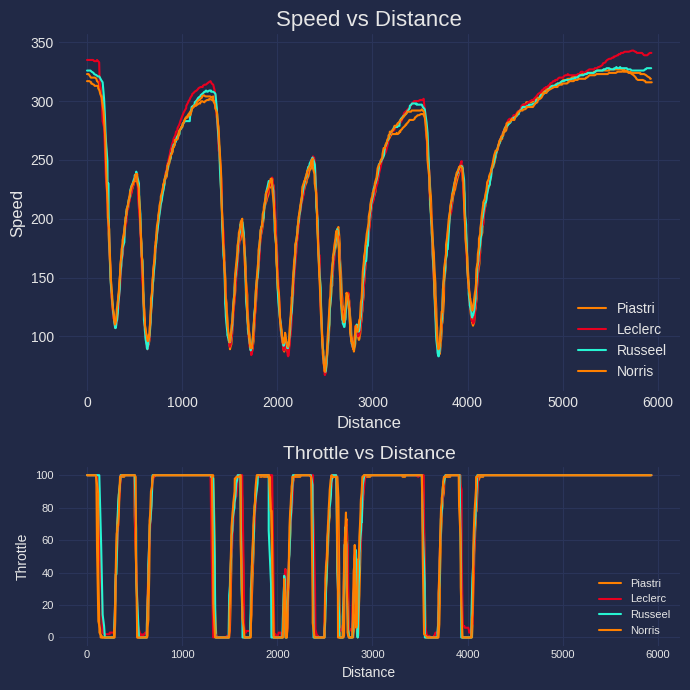

In [41]:
def get_driver_color(driver_abbreviation):
    driver = race.get_driver(driver_abbreviation)
    team_color = driver.TeamColor
    return hex_to_rgb(team_color)


fig, ax = plt.subplots(2, 1, figsize=(7, 7), height_ratios=[2, 1])

ax[0].plot(
    tele_race_pia.Distance,
    tele_race_pia.Speed,
    label="Piastri",
    color=get_driver_color("PIA"),
)
ax[0].plot(
    tele_race_lec.Distance,
    tele_race_lec.Speed,
    label="Leclerc",
    color=get_driver_color("LEC"),
)
ax[0].plot(
    tele_race_rus.Distance,
    tele_race_rus.Speed,
    label="Russeel",
    color=get_driver_color("RUS"),
)
ax[0].plot(
    tele_race_nor.Distance,
    tele_race_nor.Speed,
    label="Norris",
    color=get_driver_color("NOR"),
)
ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)

ax[1].plot(
    tele_race_pia.Distance,
    tele_race_pia.Throttle,
    label="Piastri",
    color=get_driver_color("PIA"),
)
ax[1].plot(
    tele_race_lec.Distance,
    tele_race_lec.Throttle,
    label="Leclerc",
    color=get_driver_color("LEC"),
)
ax[1].plot(
    tele_race_rus.Distance,
    tele_race_rus.Throttle,
    label="Russeel",
    color=get_driver_color("RUS"),
)
ax[1].plot(
    tele_race_nor.Distance,
    tele_race_nor.Throttle,
    label="Norris",
    color=get_driver_color("NOR"),
)
ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()

In [44]:
driver1_sectors = pd.DataFrame({
    'Driver': ['Piastri'] * len(pia_race_sec1),
    'Sector1Time': pia_race_sec1,
    'Sector2Time': pia_race_sec2,
    'Sector3Time': pia_race_sec3,
    'Lap Time' : pia_race_lap_time
})

driver2_sectors = pd.DataFrame({
    'Driver': ['Leclerc'] * len(lec_race_sec1),
    'Sector1Time': lec_race_sec1,
    'Sector2Time': lec_race_sec2,
    'Sector3Time': lec_race_sec3,
    'Lap Time' : lec_race_lap_time
})

driver3_sectors = pd.DataFrame({
    'Driver': ['Russel'] * len(rus_race_sec1),
    'Sector1Time': rus_race_sec1,
    'Sector2Time': rus_race_sec2,
    'Sector3Time': rus_race_sec3,
    'Lap Time' : rus_race_lap_time
})

driver4_sectors = pd.DataFrame({
    'Driver': ['Norris'] * len(nor_race_sec1),
    'Sector1Time': nor_race_sec1,
    'Sector2Time': nor_race_sec2,
    'Sector3Time': nor_race_sec3,
    'Lap Time' : nor_race_lap_time
})

all_drivers_sectors = pd.concat([driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors], ignore_index=True)
# all_drivers_sectors['Sector1Time'] = all_drivers_sectors['Sector1Time'].apply(convert_to_normal)
all_drivers_sectors['Sector2Time'] = all_drivers_sectors['Sector2Time'].apply(convert_to_normal)
all_drivers_sectors['Sector3Time'] = all_drivers_sectors['Sector3Time'].apply(convert_to_normal)
# all_drivers_sectors['Lap Time'] = all_drivers_sectors['Lap Time'].apply(convert_to_normal)
all_drivers_sectors.sort_values(by=["Sector1Time","Sector2Time","Sector3Time"],ascending=True).dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
196,Norris,0 days 00:00:37.530000,00:42.739000,00:25.322000,0 days 00:01:45.591000
194,Norris,0 days 00:00:37.555000,00:42.537000,00:25.163000,0 days 00:01:45.255000
195,Norris,0 days 00:00:37.587000,00:42.594000,00:25.251000,0 days 00:01:45.432000
198,Norris,0 days 00:00:37.594000,00:43.134000,00:25.158000,0 days 00:01:45.886000
197,Norris,0 days 00:00:37.649000,00:43.023000,00:25.191000,0 days 00:01:45.863000
...,...,...,...,...,...
151,Russel,0 days 00:00:42.492000,00:43.856000,00:37.119000,0 days 00:02:03.467000
190,Norris,0 days 00:00:54.126000,00:43.027000,00:25.338000,0 days 00:02:02.491000
15,Piastri,0 days 00:00:54.377000,00:43.420000,00:25.456000,0 days 00:02:03.253000
114,Russel,0 days 00:00:54.875000,00:44.229000,00:25.079000,0 days 00:02:04.183000


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


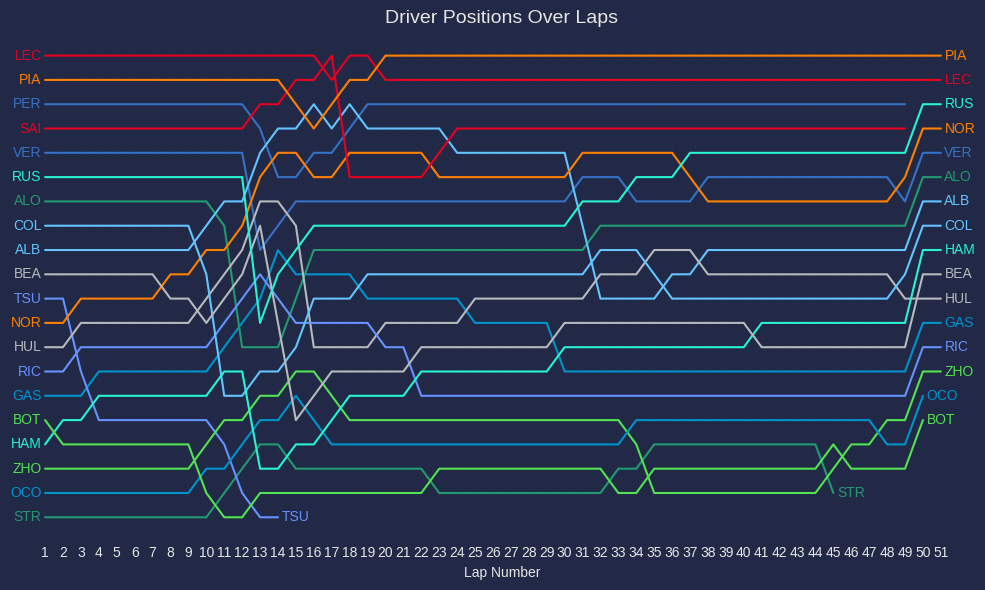

In [45]:
# Get unique drivers and total number of laps
drivers = race.laps.Driver.unique()
drivers_ab = drivers.tolist()
nlaps = int(race.laps.LapNumber.unique().max())

# Initialize an empty dictionary to store team colors
team_colors = {}

# Fetch the team color for each driver dynamically and convert to RGB
for driver in drivers_ab:
    driver_object = quali.get_driver(driver)
    hex_color = driver_object.TeamColor
    team_colors[driver] = hex_to_rgb(hex_color)

# Plot each driver's positions with their team color
plt.figure(figsize=(10, 6))  # Adjust figure size
for driver in drivers_ab:
    positions = laps[laps['Driver'] == driver]['Position'].values  
    color = team_colors.get(driver, (0.5, 0.5, 0.5))  # Default to gray if no color is specified
    plt.plot(range(1, len(positions) + 1), positions, label=driver, color=color)
    
    # Annotate driver name at the start of the line
    plt.text(
        1 - 0.2,  # Slightly to the left of the first lap
        positions[0],  # Y-coordinate of the first position
        driver,  # Driver's name
        color=color,  # Use the driver's color
        fontsize=10,  # Font size
        verticalalignment='center',  # Center the text vertically
        horizontalalignment='right'  # Align text to the right of the point
    )
    
    # Annotate driver name at the end of the line
    plt.text(
        len(positions) + 0.2,  # Slightly to the right of the last lap
        positions[-1],  # Y-coordinate of the last position
        driver,  # Driver's name
        color=color,  # Use the driver's color
        fontsize=10,  # Font size
        verticalalignment='center',  # Center the text vertically
        horizontalalignment='left'  # Align text to the left of the point
    )

# Add plot title and labels
plt.title("Driver Positions Over Laps", fontsize=14)
plt.grid(True, linestyle=':', alpha=0.5)
plt.xlim(0.5, float(nlaps) + 1.5)  # Extend x-axis to leave space for annotations
plt.xlabel("Lap Number")
plt.ylim(0, 21)
plt.gca().invert_yaxis()  # Invert y-axis so positions are ranked correctly
plt.gca().set_yticks([])
plt.xticks(range(1, nlaps + 1))
plt.tight_layout()
plt.show()

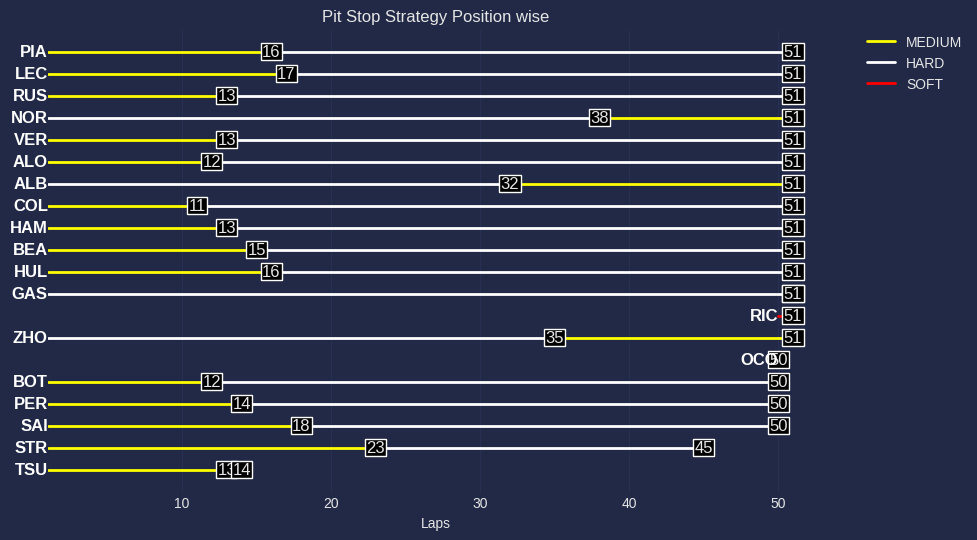

In [46]:
def getDriverPosition(abbreviation: str):
    res = race.results
    c = res["Abbreviation"] == abbreviation
    pos = res.loc[c, ["Position"]]
    posi = pos.iloc[-1]
    return int(posi.iloc[0])


def getCompound(abbreviation: str):
    driver_race = race.laps.pick_driver(abbreviation)
    lastLap = driver_race.LapNumber.count()
    if driver_race["TyreLife"].iloc[0] == 1.0:
        condition = driver_race["TyreLife"] == 1
        driver_comp = driver_race.loc[condition, ["Compound", "LapNumber"]]
        compound = driver_comp.Compound.tolist()
        return compound, driver_comp, lastLap
    else:
        compound = []
        result = []
        for i in range(0, len(driver_race["TyreLife"])):
            if driver_race["TyreLife"].iloc[i] < driver_race["TyreLife"].iloc[i - 1]:
                result.append(
                    {
                        "Compound": driver_race["Compound"].iloc[i],
                        "LapNumber": driver_race["LapNumber"].iloc[i],
                    }
                )
                compound.append(driver_race["Compound"].iloc[i])

        driver_comp = pd.DataFrame(result)
        return compound, driver_comp, lastLap


fig, ax = plt.subplots(figsize=(10, 6))

color_mapping = {
    "MEDIUM": "yellow",
    "SOFT": "red",
    "HARD": "white",
    "INTERMEDIATE": "green",
    "WET": "blue",
}
drivers = race.laps.Driver.unique()
drivers_ab = drivers.tolist()
used_labels = set()
for driver in drivers_ab:
    compound, driver_comp, lastLap = getCompound(driver)

    list1 = driver_comp.LapNumber.tolist()
    list1.append(lastLap)
    int_list = [int(x) for x in list1]
    x_points = int_list
    n = len(int_list)
    posi = getDriverPosition(driver)
    y_points = [posi] * n

    for i in range(len(driver_comp.LapNumber)):
        x_segment = [x_points[i], x_points[i + 1]]
        y_segment = [y_points[i], y_points[i + 1]]
        tire_color = color_mapping.get(compound[i], "unknown")
        label = compound[i] if compound[i] not in used_labels else None
        
        ax.plot(x_segment, y_segment, color=tire_color, linewidth=2, label=label)
        used_labels.add(compound[i])

        ax.text(
            x_points[i + 1],
            y_points[i + 1],
            str(x_points[i + 1]),
            fontsize=12,
            ha="center",
            va="center",
            bbox=dict(facecolor="black", edgecolor="white", pad=1),
        )
        ax.annotate(f'{i}',
                xy=(0, 1),
                xytext=(-10, 0),
                textcoords='offset points',
                va='center',
                ha='right',
                color="white",
                fontweight='bold')
    ax.text(
        x_points[0], 
        y_points[0], 
        driver, 
        fontsize=12, 
        ha='right', 
        va='center', 
        color="white", 
        fontweight='bold',
    )
    
ax.set_xlim(1, 53)
ax.invert_yaxis()
ax.set_ylim(21, 0)
ax.set_title("Pit Stop Strategy Position wise")
ax.set_xlabel("Laps")
plt.gca().set_yticks([])
ax.axvline(x=0, color='black', linewidth=2)
ax.grid(True, linestyle="-", alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.show()


In [47]:
res = race.results
drivers = res['Abbreviation'].tolist()
fastest_speed = pd.DataFrame(columns=['Driver', 'Speed'])
for i in drivers:
    tele = race.laps.pick_driver(i)
    speed = tele.SpeedST.max()
    df = pd.DataFrame({'Driver': [i], 'Speed': [speed]})
    fastest_speed = pd.concat([fastest_speed, df], ignore_index=True)
fastest_speed.sort_values(by="Speed",ascending=True)
    

/tmp/ipykernel_59394/2770152713.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fastest_speed = pd.concat([fastest_speed, df], ignore_index=True)


,Driver,Speed
19,TSU,321.0
15,BOT,322.0
18,STR,322.0
16,PER,324.0
1,LEC,325.0
17,SAI,325.0
13,ZHO,325.0
12,RIC,325.0
3,NOR,326.0
4,VER,326.0


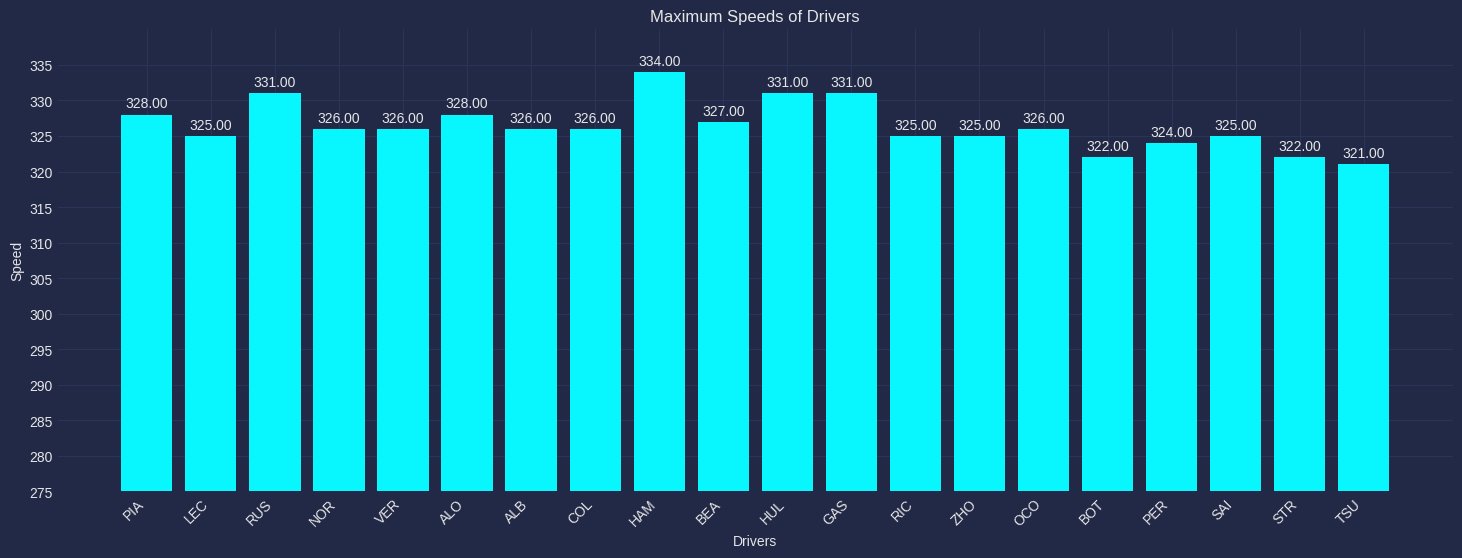

In [48]:
fig,ax = plt.subplots(figsize=(18, 6))


bars = ax.bar(fastest_speed['Driver'], fastest_speed['Speed'])

ax.set_xlabel('Drivers')

ax.set_ylabel('Speed')

ax.set_title('Maximum Speeds of Drivers')

plt.xticks(rotation=45, ha='right')

y_min = 275
y_max = np.ceil(fastest_speed['Speed'].max() / 5) * 5 + 5
y_ticks = np.arange(y_min, y_max, 5)
ax.set_ylim(y_min, y_max)
ax.set_yticks(y_ticks)

for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.2f}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Display the plot
plt.show()

In [49]:
plotting.setup_mpl()

In [61]:
laps_nor = laps.pick_driver("NOR")
laps_ver = laps.pick_driver("VER")

fastest_nor = laps_nor.pick_fastest().get_telemetry().add_distance()
fastest_ver = laps_ver.pick_fastest().get_telemetry().add_distance()

fastest_nor["Driver"] = "NOR"
fastest_ver["Driver"] = "VER"
telemetry = pd.concat([fastest_nor,fastest_ver])

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


In [62]:
num_minisectors = 25

total_distance = total_distance = max(telemetry['Distance'])

minisector_length = total_distance / num_minisectors

In [65]:
minisectors = [0]

# Add multiples of minisector_length to the minisectors
for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))

In [66]:

telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )
)

In [67]:
average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()
average_speed

,Minisector,Driver,Speed
0,1,NOR,283.083333
1,1,VER,281.400000
2,2,NOR,159.205128
3,2,VER,153.813953
4,3,NOR,149.234043
5,3,VER,146.409091
6,4,NOR,228.200000
7,4,VER,226.518519
8,5,NOR,285.791667
9,5,VER,286.347826


In [68]:
# Select the driver with the highest average speed
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]

# Get rid of the speed column and rename the driver column
fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_driver'})


In [69]:

# Join the fastest driver per minisector with the full telemetry
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])

# Order the data by distance to make matploblib does not get confused
telemetry = telemetry.sort_values(by=['Distance'])

# Convert driver name to integer
telemetry.loc[telemetry['Fastest_driver'] == 'NOR', 'Fastest_driver_int'] = 1
telemetry.loc[telemetry['Fastest_driver'] == 'VER', 'Fastest_driver_int'] = 2

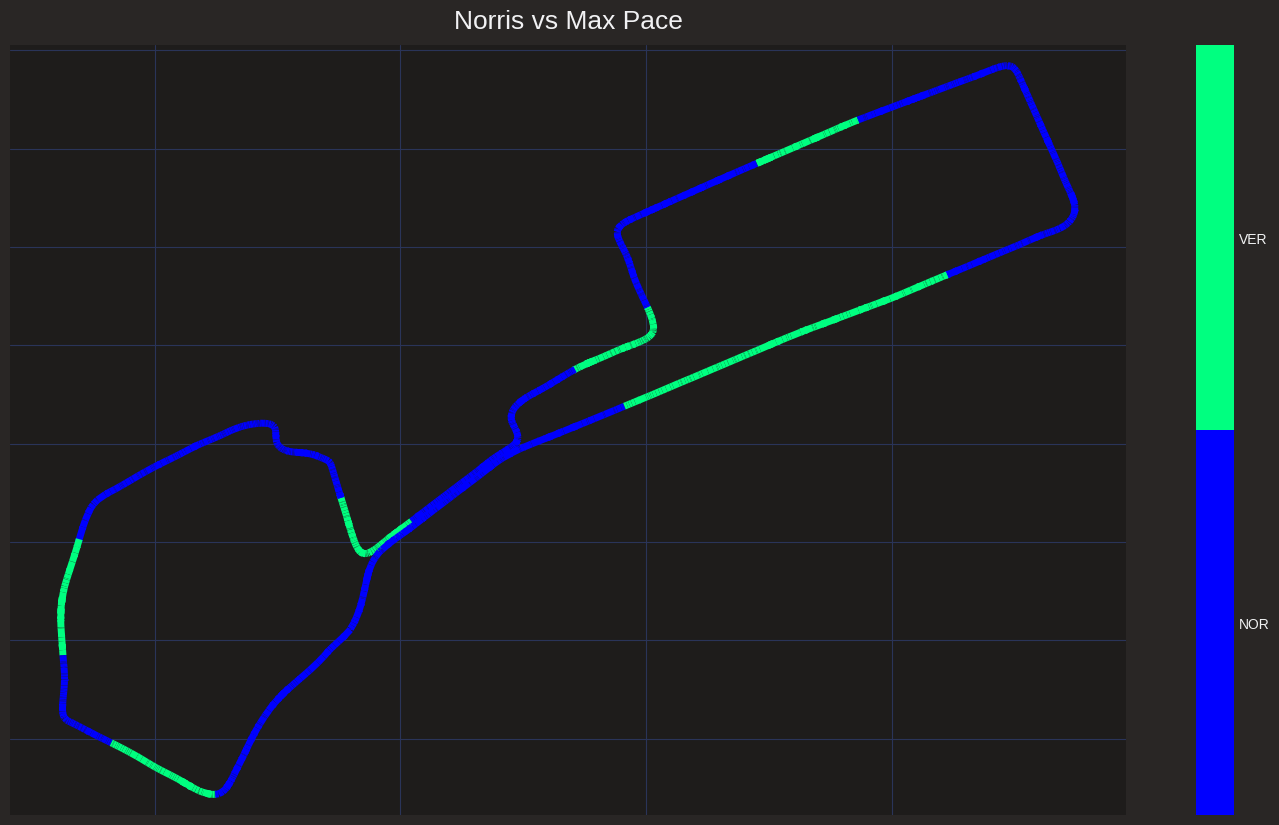

In [71]:
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_driver_int'].to_numpy().astype(float)

cmap = plt.get_cmap('winter', 2)  # Create a colormap with 2 colors
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

plt.rcParams['figure.figsize'] = [18, 10]
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

# Adjust the colorbar settings
cbar = plt.colorbar(mappable=lc_comp, boundaries=[1, 2, 3])
cbar.set_ticks([1.5, 2.5])
cbar.set_ticklabels(['NOR', 'VER'])
plt.title("Norris vs Max Pace")
plt.show()
